# Linear Regression


In this notebook, I am going to learn and implement Linear Regression.

There are two different ways to train Linear Regression :

- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set.


- Using an iterative optimization approach called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set.

    There are few variants of Gradient Descent
    
    - Batch GD
    - Mini-batch GD
    - Stochastic GD
    
    
Generally Linear regression model predicition is simply sum of the input features, plus a constant called _bias term_.

\begin{align}
\dot{y} & = \theta_0 + \theta_1 * x_1+ \theta_2 * x_2 +.......+ \theta_n * x_n \
\end{align}


- y is the predicted value
- n is the number of features
- $x_i$ is the $i^{th}$ feature value
- $\theta_j$ is the $j{th}$ model parameter


Vectorized form of Linear Model :

\begin{align}
\dot{y} & = h_{\theta}(x) = \theta^T * x\
\end{align}

- $\theta$ is the model _Parameter vector_, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_0$
- $\theta^T$ is the transpose of $\theta$
- x is the instaces _feature vector_, containing $x_0$ to $x_n$ with $x_0$ always equal to 1.
- $\theta^T$.x is the dot product of $\theta^T$ and x.
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$

Training a model means setting its parameters so that the model best fits the training set. First we need a measure of how well the model fits the training data. Most common performance measure of a regression model is the _Root Mean Square Error(RMSE)_. It is simpler to minimize the _Mean Square Error(MSE)_ than the RMSE, it leads to same result.


The _MSE_ of a Linear Regression hypothesis $h_{\theta}$ on a training set X is calculated using below equation :

\begin{align}
MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^m(\theta^T. x^{(i)} - y^{(i)})^2
\end{align}

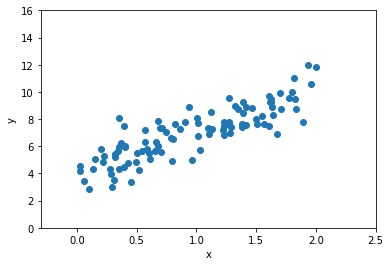

In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 4+3*x+ np.random.randn(100,1)

plt.scatter(x,y)
plt.xlim(-0.3,2.5)
plt.ylim(0,16)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
X_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.09970847],
       [3.00237339]])

The actual function we used to generate data is 

\begin{align}
y = 4 + 3* x_0 + noise
\end{align}

our theta values 

$\theta_0$ : 4.00805978

$\theta_1$ : 3.03847419

In [4]:
X_new = np.array([[0],[2]])

X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.09970847],
       [10.10445524]])

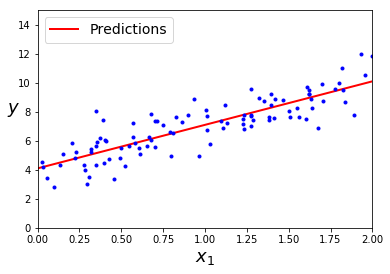

In [5]:
plt.plot(X_new,y_predict,"r-", linewidth=2, label="Predictions")
plt.plot(x,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

The equivalent code using Scikit-Learn is :

In [6]:
from sklearn.linear_model import LinearRegression

lin_Reg = LinearRegression()
lin_Reg.fit(x,y)
lin_Reg.intercept_, lin_Reg.coef_

(array([4.09970847]), array([[3.00237339]]))

In [7]:
lin_Reg.predict(X_new)

array([[ 4.09970847],
       [10.10445524]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.09970847],
       [3.00237339]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.09970847],
       [3.00237339]])